<a href="https://colab.research.google.com/github/Swathy1209/OASIS/blob/main/oasis_project1_level2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import zipfile
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
with zipfile.ZipFile('/content/archive (3).zip', 'r') as zip_ref:
    # List all files in the zip
    file_list = zip_ref.namelist()
    print(file_list)  # Print the list to choose the correct file

    # Assuming 'ifood_df.csv' is the CSV you want
    with zip_ref.open('ifood_df.csv') as file:
        df = pd.read_csv(file)

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

['dictionary.png', 'ifood_df.csv']
    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  edu

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[-0.76328829 -0.74770043 -0.71680162  0.51593369 -0.85300562]
 [ 0.92883505  0.95926313  0.88464821 -0.63364865 -0.0056825 ]
 [-0.64797382 -0.71178688 -0.62782309  0.44706002  0.90375127]]


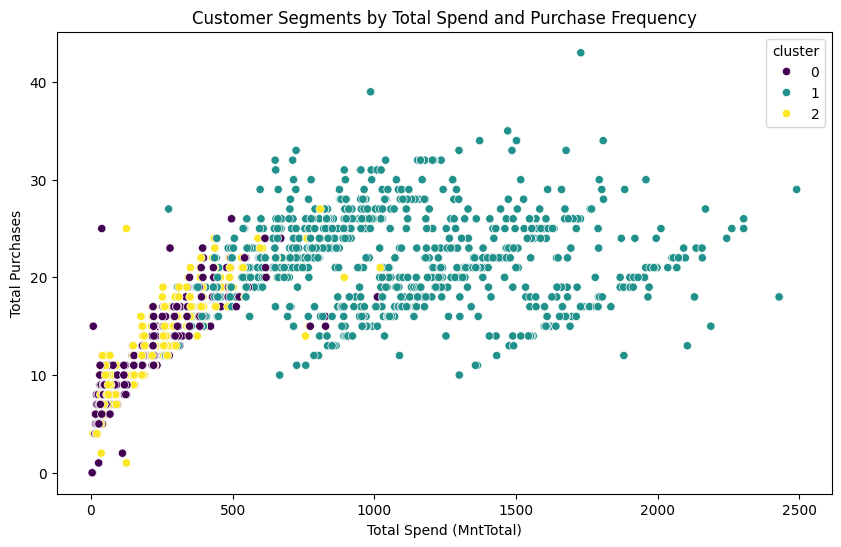

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
cluster                                                                       
0        35815.641186  0.698908  0.489860  24.335413   77.266771   6.694228   
1        70856.751312  0.103882  0.479538  48.844701  597.924449  52.022036   
2        38203.615385  0.700491  0.566285  75.150573   91.232406   7.121113   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
cluster                                                                     
0              32.496100         9.794072          5.982839     23.081123   
1             337.015740        74.286464         53.865687     71.223505   
2              36.836334        10.114566          7.608838     23.690671   

         ...  marital_Widow  education_2n Cycle  education_Basic  \
cluster  ...                                                       
0        ...       0.028081            0.099844         0.049922   
1        ...  

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Load the dataset
with zipfile.ZipFile('/content/archive (3).zip', 'r') as zip_ref:
    # Extract the CSV file to a temporary location
    zip_ref.extract('ifood_df.csv')  # Assuming 'ifood_df.csv' is the correct file

# Read the extracted CSV file
data = pd.read_csv('ifood_df.csv')

# Display the first few rows of the dataset
print(data.head())

# Get basic information about the dataset
print(data.info())

# Calculate average purchase value
average_purchase_value = data['MntTotal'].mean()
print(f'Average Purchase Value: {average_purchase_value}')

# Calculate frequency of purchases
data['TotalPurchases'] = data[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
purchase_frequency = data['TotalPurchases'].mean()
print(f'Purchase Frequency: {purchase_frequency}')

# Select features for clustering
features = data[['Income', 'MntTotal', 'TotalPurchases', 'NumWebVisitsMonth', 'Recency']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Print cluster centers
print(kmeans.cluster_centers_)

# Scatter plot of the clusters based on MntTotal and TotalPurchases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='MntTotal', y='TotalPurchases', hue='cluster', palette='viridis')
plt.title('Customer Segments by Total Spend and Purchase Frequency')
plt.xlabel('Total Spend (MntTotal)')
plt.ylabel('Total Purchases')
plt.show()

# Analyze characteristics of each segment
cluster_analysis = data.groupby('cluster').mean()
print(cluster_analysis)

# Provide insights based on the analysis
for cluster in cluster_analysis.index:
    print(f'Cluster {cluster}:')
    print(f'Average Income: {cluster_analysis.loc[cluster, "Income"]}')
    print(f'Average Total Spend: {cluster_analysis.loc[cluster, "MntTotal"]}')
    print(f'Average Total Purchases: {cluster_analysis.loc[cluster, "TotalPurchases"]}')
    print(f'Average Web Visits per Month: {cluster_analysis.loc[cluster, "NumWebVisitsMonth"]}')
    print(f'Average Recency: {cluster_analysis.loc[cluster, "Recency"]}')
    # Add more insights as needed

Average Purchase Value: 51622.0947845805
Purchase Frequency: 562.7646258503402
[[-1.45519152e-11  0.00000000e+00]
 [-1.45519152e-11  0.00000000e+00]
 [-1.45519152e-11  0.00000000e+00]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


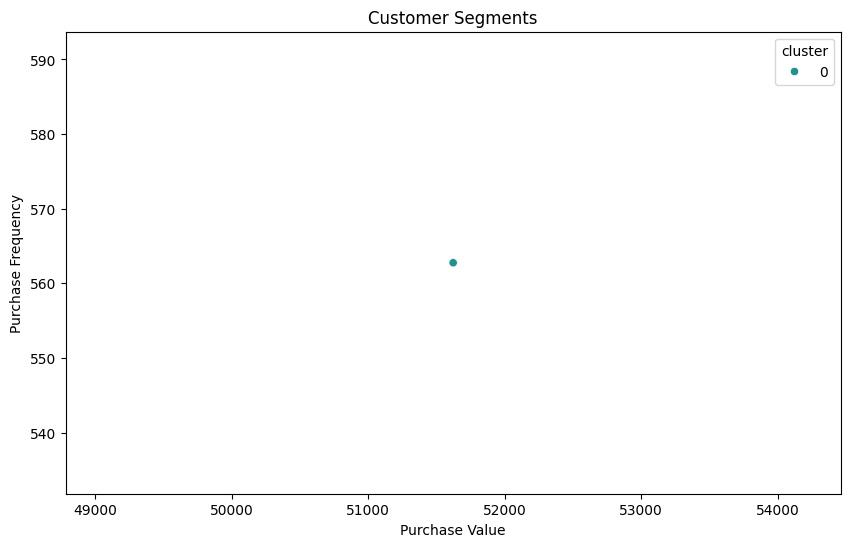

               Income   Kidhome  Teenhome   Recency    MntWines  MntFruits  \
cluster                                                                      
0        51622.094785  0.442177  0.506576  49.00907  306.164626  26.403175   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
cluster                                                                     
0             165.312018        37.756463         27.128345     44.057143   

         ...  education_2n Cycle  education_Basic  education_Graduation  \
cluster  ...                                                              
0        ...            0.089796          0.02449              0.504762   

         education_Master  education_PhD    MntTotal  MntRegularProds  \
cluster                                                                 
0                0.165079       0.215873  562.764626       518.707483   

         AcceptedCmpOverall  purchase_value  purchase_frequency  
cluster              

In [ ]:
average_purchase_value = df['Income'].mean()
df['purchase_value'] = average_purchase_value # Add new column for average purchase value
print(f'Average Purchase Value: {average_purchase_value}')

purchase_frequency = df['MntTotal'].mean()
df['purchase_frequency'] = purchase_frequency # Add new column for purchase frequency
print(f'Purchase Frequency: {purchase_frequency}')

# Select features for clustering (example: 'purchase_value' and 'purchase_frequency')
features = df[['purchase_value', 'purchase_frequency']]
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Print cluster centers
print(kmeans.cluster_centers_)

# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['purchase_value'], y=df['purchase_frequency'], hue='cluster', palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Purchase Value')
plt.ylabel('Purchase Frequency')
plt.show()

# Analyze characteristics of each segment
cluster_analysis = df.groupby('cluster').mean()
print(cluster_analysis)

# Provide insights based on the analysis
for cluster in cluster_analysis.index:
    print(f'Cluster {cluster}:')
    print(f'Average Purchase Value: {cluster_analysis.loc[cluster, "purchase_value"]}')
    print(f'Average Purchase Frequency: {cluster_analysis.loc[cluster, "purchase_frequency"]}')